In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [0]:
import os
import shutil
import random

In [0]:
import torch
import torchvision.models as torch_models

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/mini-proj/'

In [0]:
#
# Read data from .csv

info = pd.read_csv(path+'info.csv')

In [0]:
print('Is CUDA available?', torch.cuda.is_available())
print('pytorch version:', torch.__version__)
torch.backends.cudnn.enabled

Is CUDA available? True
pytorch version: 1.0.1.post2


True

**Labels**

*   *North* - 1
*   *South*  - 0



# Dataset size

**Test set**
*   North = 125
*   South = 125

**Validation set**
*   North = 125
*   South = 125

**Training set**
*   North = 532
*   South = 510

In [0]:
path += 'mini-data/'
path_train = path+'split-img/'+'train'
path_valid = path+'split-img/'+'val'

In [0]:
data = ImageDataBunch.from_folder(path+'/split-img', train='train', valid='val', ds_tfms=get_transforms(), size=224)

# data = (ImageList.from_folder(path)
#         .split_by_rand_pct()
#         .split_by_folder(train=path_train, valid=path_valid)
#         .label_from_folder()
#         .transform(tfms, size=224)
#         .databunch())

In [0]:
# data.show_batch(rows=5, figsize=(10,10))

In [0]:
print(data.classes)

['north', 'south']


In [0]:
# ??cnn_learner

**https://docs.fast.ai/basic_train.html**

In [0]:
# ??models


In [0]:

learn = cnn_learner(data, models.resnet152, metrics=accuracy, pretrained=True)
# list of models with pretrained weights (prefix with models. )
# squeezenet1_0
# squeezenet1_1
# resnet152
# resnet101
# resnet18
# resnet34
# resnet50
# alexnet
# densenet121
# densenet161
# densenet169
# densenet201
# vgg16_bn
# vgg19_bn

# prefix with torch_models
# inception_v3


# learn = cnn_learner(data, models.xresnet152, metrics=accuracy, pretrained=False)
# list of models without pretrained weights
# xresnet50
# xresnet101
# xresnet18
# xresnet34
# xresnet152

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.torch/models/resnet152-b121ed2d.pth
241530880it [00:05, 48155794.77it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


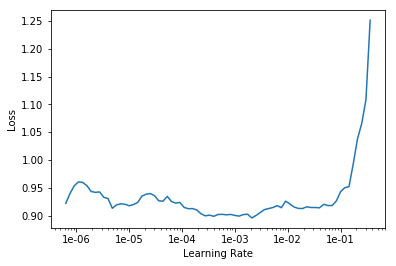

In [0]:
learn.lr_find()
learn.recorder.plot()

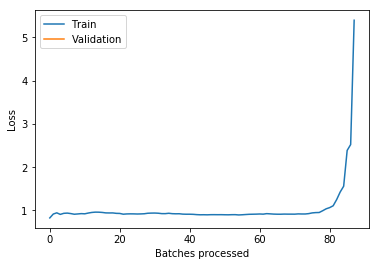

In [0]:
learn.recorder.plot_losses()

In [0]:
# learn.unfreeze()
# learn.fit_one_cycle(12, max_lr=slice(1e-4,1e-2))
learn.fit_one_cycle(5)

In [0]:
learn.recorder.plot()

In [0]:
# learn.model

In [0]:
# learn.fit_one_cycle(12, max_lr=slice(1e-5,1e-4))
# learn.fit_one_cycle(12)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(9, heatmap=False, figsize=(10,10))

In [0]:
# ??learn.recorder.plot_losses()

In [0]:
learn.recorder.plot_losses()

In [0]:
interp.plot_confusion_matrix(figsize=(4,4), dpi=80)

In [0]:
learn.recorder.plot_lr(show_moms=True)

In [0]:
# learn.summary()

In [0]:
# learn.show_results(rows=3)

In [0]:
learn.recorder.plot_metrics()

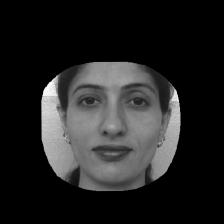

In [0]:
img = learn.data.train_ds[56][1]
img

In [0]:
learn.predict(img)

(Category south, tensor(1), tensor([0.3694, 0.6306]))